<a href="https://colab.research.google.com/github/Theveetha/LendingClub_EDA_CaseStudy/blob/main/LendingClub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set 1
- Connect to the data
- Gather basic information on the data
- plot graphs if required for that
- understand the data
- First level of Data Preprocessing (remove columns or rows)

Set 2
- Understand the target column
- Univariant Analysis of all the columns
- Data Preprocessing post set 2

Set 3
- Bivariant Analysis

Set 4
- Multivariant Analysis

Set 5
- Observations

# ***Lending Club EDA Case Study***

Data: Lending Club is a company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. This dataset gives us a details of the applicant's and their current status.

To Analyse: Do a general EDA on how the various factors plays a role in applicant's loan status.

## Import Required Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import and read the dataset

In [6]:
file_path = '/content/drive/MyDrive/Stats&ML_Dataset/loan.csv'
original_data = pd.read_csv(file_path)

# To display all columns and all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Creating a copy to work on the analysis
data = original_data.copy()
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Basic Info about the dataframe

**Checking the dimensions**

In [7]:
data.shape
print(f"Number of Features : {data.shape[1]}")
print(f"Number of Records : {data.shape[0]}")

Number of Features : 111
Number of Records : 39717


**Features before preprocessing data**

In [8]:
print("Features before preprocessing the data")
col = []
for cols in data.columns:
  col.append(cols)
print(col)

Features before preprocessing the data
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

**Percentage of missing values in the dataframe**

In [17]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

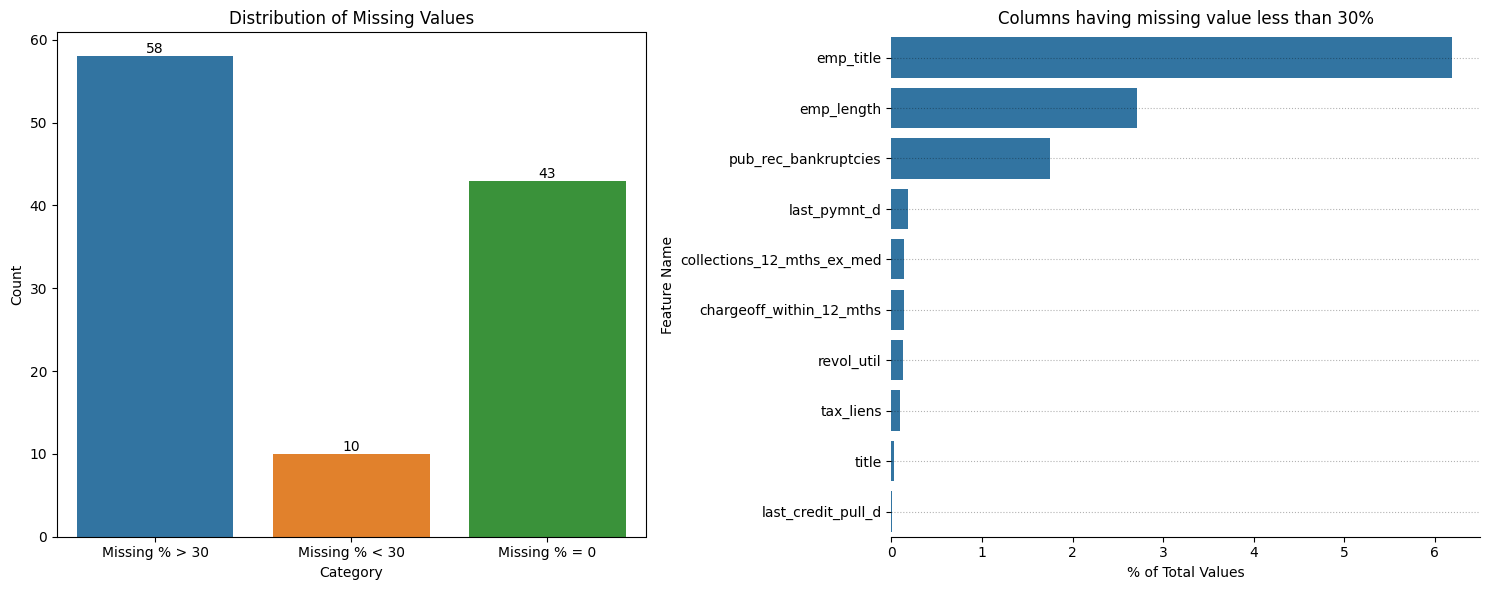

In [79]:
mis_val = data.isnull().sum()
mis_val_percent = round(100 * data.isnull().sum()/len(data),2)
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_val_table.columns = ['Missing Values', '% of Total Values']
mis_val_table = mis_val_table.sort_values('% of Total Values',ascending=False)

Category = []
for i in range(0,len(mis_val_table)):
  if mis_val_table['% of Total Values'][i] == 0:
    Category.append('Missing % = 0')
  elif 0 < mis_val_table['% of Total Values'][i] <= 30:
    Category.append('Missing % < 30')
  else:
    Category.append('Missing % > 30')

mis_val_table['Category'] = Category

mis_val_gt30 = mis_val_table[mis_val_table['Category'] == 'Missing % > 30']
mis_val_lt30 = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']
mis_val_0 = mis_val_table[mis_val_table['Category'] == 'Missing % = 0']

# Graphical representation
fig = plt.figure(figsize=(15,6))

sec1 = plt.subplot(1,2,1)
sec1.set_title("Distribution of Missing Values")
viz = sns.countplot(data=mis_val_table, x='Category',hue='Category')
for containers in viz.containers:
  viz.bar_label(containers)
viz.set_xlabel('Category')
viz.set_ylabel('Count')

sec2 = plt.subplot(1,2,2)
sec2.set_title("Columns having missing value less than 30%")
viz = sns.barplot(data=mis_val_lt30,x='% of Total Values',y=mis_val_lt30.index)
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)
viz.set_ylabel('Feature Name')
section(sec2)

plt.tight_layout()
plt.show()

##### **OBSERVATION**
Columns having more than 30% missing value (58 columns) will lead to biased output.

Columns having more than 0% and less than 30% missing values (10 columns) need to be treated for further analysis.

***To Do:***
1. Remove those 58 columns from our dataframe
2. Treat the missing values for those 10 columns in preprocessing step